# Car Pricing Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [3]:
labels = df['Car Model'].unique()
labels

array(['BMW X5', 'Audi A5', 'Mercedez Benz C class'], dtype=object)

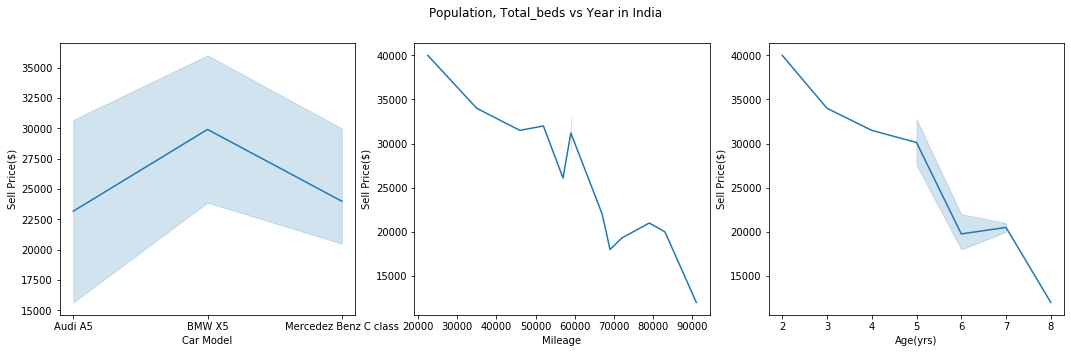

In [4]:
## visualising the data
import seaborn as sns
f, axes = plt.subplots(1,3,figsize=(18,5))
sns.lineplot( y="Sell Price($)", x='Car Model', data=df , ax=axes[0])
axes[0].set_xticks(labels)
sns.lineplot( y="Sell Price($)", x='Mileage', data=df,  ax=axes[1]);
sns.lineplot( y="Sell Price($)", x='Age(yrs)', data=df,  ax=axes[2]);
f.suptitle('Population, Total_beds vs Year in India')
plt.show()

### After looking at these subplots, we can see that Linear Regression can be applied.

## Using dummy variable

In [5]:
dummies = pd.get_dummies(df['Car Model'],drop_first=True)
dummies

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


In [6]:
new_df = pd.concat([df,dummies],axis=1)
new_df

,Car Model,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,1,0
1,BMW X5,35000,34000,3,1,0
2,BMW X5,57000,26100,5,1,0
3,BMW X5,22500,40000,2,1,0
4,BMW X5,46000,31500,4,1,0
5,Audi A5,59000,29400,5,0,0
6,Audi A5,52000,32000,5,0,0
7,Audi A5,72000,19300,6,0,0
8,Audi A5,91000,12000,8,0,0
9,Mercedez Benz C class,67000,22000,6,0,1


In [7]:
final = new_df.drop(['Car Model'],axis=1)
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [8]:
X = final.drop(['Sell Price($)'],axis=1)
X

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [9]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [10]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.score(X,y)

0.9417050937281082

## Accuracy of the model is 94.17%.

### To predict Price of a Mercedez Benz that is 4 year old with mileage 45000.

In [12]:
model.predict([[45000,4,0,1]])

array([36991.31721061])

#### Price of a Mercedes Benz that is 4 year old with mileage 45000 is 36991.31721061

### To predict Price of a BMW X5 that is 7 year old with mileage 86000.

In [13]:
model.predict([[86000,7,1,0]])

array([11080.74313219])

#### Price of a BMW X5 that is 7 year old with mileage 86000 is 11080.74313219

## Using One hot Encoder

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
df1 = df
df1

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [16]:
df1['Car Model'] = le.fit_transform(df1['Car Model'])
df1

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [17]:
X=df1.drop(['Sell Price($)'],axis=1)
#X=df1[['Car Model','Mileage','Age(yrs)']].values
X


,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [18]:
y = df1['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('Car Model',ohe,[0])],remainder="passthrough")

In [20]:
X=ct.fit_transform(X)
X = X[:,1:]
X

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [21]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
model.score(X,y)

0.9417050937281083

## Accuracy of the model is 94.17%.

### To predict Price of a Mercedez Benz that is 4 year old with mileage 45000.

In [23]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

#### Price of a Mercedes Benz that is 4 year old with mileage 45000 is 36991.31721062

### To predict Price of a BMW X5 that is 7 year old with mileage 86000.

In [24]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

#### Price of a BMW X5 that is 7 year old with mileage 86000 is 11080.74313219